## 1. Preprocessing 

### 1.1 Importing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### 1.2 Reading data

In [2]:
url = "https://drive.google.com/file/d/1a4DUEaAP5YRAE3CJ1oJz3Sg21BcrMBEq/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [3]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrTyp

In [4]:
data.sample(15)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
529,32668,NaN,2035,4,2,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Alloca
414,11228,59.0,1080,3,1,0,3,196,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
462,8281,60.0,864,3,1,0,1,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
1184,35133,50.0,1572,3,2,0,3,0,263,0,...,2Types,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
779,10530,78.0,975,2,0,0,2,0,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1213,10246,NaN,648,0,0,0,1,88,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
707,6240,48.0,1324,2,1,0,2,192,0,1,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
320,16259,111.0,1249,4,0,0,3,240,0,1,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
643,10793,80.0,780,4,0,0,2,208,0,0,...,Attchd,Fin,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
611,10395,NaN,1032,3,1,0,2,0,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal


In [5]:
data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [6]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [7]:
data.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [8]:
data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [9]:
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 1.3 X and y labels creating 

In [10]:
X = data                 #drop if need a few columns are't usefull
y = X.pop("Expensive")

### 1.4 Spliting the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 1.5 Creating 2 pipelines are performing in pararel and add it in preprocessor

In [18]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

2. Modeling -  Decision Tree

In [13]:
from sklearn.model_selection import GridSearchCV
big_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}
  
search_dt = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dt.fit(X_train, y_train)  

scores = {"dtree" : search_dt.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9289314405194233}

3. Error Analysis

3.1 Test acuracy

In [14]:
accuracy_score(search_dt.predict(X_test), y_test)
#without any fit to this data

0.928082191780822

3.2 Plot it using ConfusionMatrix

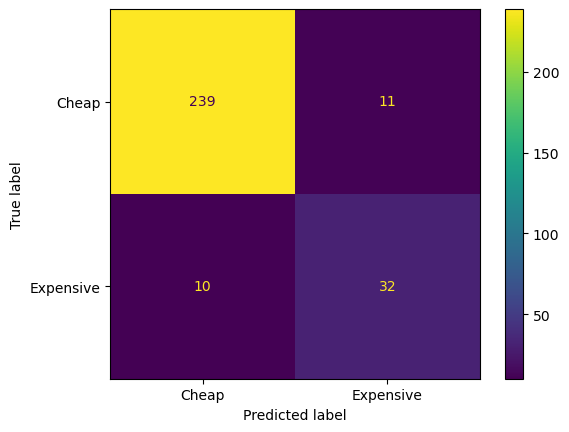

In [26]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_dt,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [21]:
DecisionTreeClassifier = dt_df      #pd.DataFrame(search_dt.predict(xx_test))
DecisionTreeClassifier.to_csv('DecisionTreeClassifier.csv', index=False)

NameError: name 'dt_df' is not defined

In [20]:
dt_df = pd.DataFrame(search_lr.predict(xx_test))
dt_df.rename(columns = {0:'Expensive'}, inplace=True)
dt_df

NameError: name 'search_lr' is not defined

In [22]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_dt.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.8971428571428571

In [23]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_dt.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.7529411764705882

In [ ]:
++ METRICS F1 SCORE

In [27]:
from sklearn import metrics
y_pred = y_train
y_true = search_dt.predict(X_train)
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)
metrics.fbeta_score(y_true, y_pred, beta=0.5)
metrics.fbeta_score(y_true, y_pred, beta=1)
metrics.fbeta_score(y_true, y_pred, beta=2)
metrics.precision_recall_fscore_support(y_true, y_pred)#, beta=0.5)

(array([0.98187311, 0.89714286]),
 array([0.98187311, 0.89714286]),
 array([0.98187311, 0.89714286]),
 array([993, 175], dtype=int64))

In [29]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_dt.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)


0.8971428571428571

In [30]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_dt.predict(X_test)
f1_score(y_true, y_pred)# average=None)

0.7529411764705882

In [31]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

## 2.Preprocessing data For KNN Classifier

For KNeighborsClassifier we must to scale our data
So we making the another one 'preprocessing'

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [33]:
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

2. Modeling - KNeighborsClassifier

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


big_pipeline = make_pipeline(preprocessor,
                              KNeighborsClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "kneighborsclassifier__n_neighbors": range(3, 10, 2)#not be the pairs numbers (2,4,6,8)
    #"kneighborsclassifier__p":[1.3],  #not really usefull
    #"kneighborsclassifier__weights":['distance', 'uniform']    #not really usefull
}

search_knn = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train, y_train)

scores = {"KNN" : search_knn.best_score_}
scores

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'KNN': 0.9263636697113091}

In [35]:
search_knn.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 5}

3. Error Analysis
3.1 Test data accuracy 

In [36]:
accuracy_score(search_knn.predict(X_test), y_test)
#without any fit to this data

0.934931506849315

3.2 Plot it 

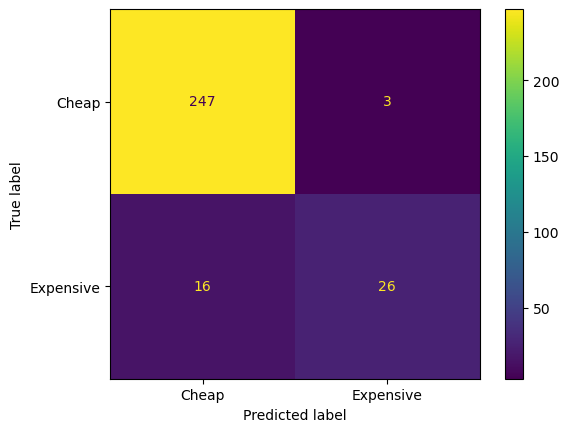

In [37]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_knn,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [ ]:
KNeighborsClassifier = search_knn       #pd.DataFrame(search_knn.predict(xx_test))
KNeighborsClassifier.to_csv('KNeighborsClassifier.csv', index=False)

In [ ]:
# ?????????????????
knn_df = pd.DataFrame(search_knn.predict(y_train))
knn_df.rename(columns = {0:'Expensive'}, inplace=True)
knn_df

In [44]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_knn.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.7766990291262136

In [45]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_knn.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.732394366197183

In [ ]:
pd.DataFrame(search_knn.predict(xx_test))

## 3. sklearn.linear_model.LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#ORIGINAL 
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [50]:
#ORIGINAL 
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(preprocessor,
                              LogisticRegression())

param_grid = {
     "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
     "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
     "logisticregression__random_state":[0],
     "logisticregression__solver":["liblinear", "saga", "lbfgs"], #'lbfgs' doesn't work wirh StandardScaler
     "logisticregression__penalty":["l2"], #'l1' doesn't work with 'lbfgs' 
     "logisticregression__tol":[0.01]
}

search_lr = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_lr.fit(X_train, y_train)

scores = {"LogisticRegression" : search_lr.best_score_}
scores

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'LogisticRegression': 0.9460621400535564}

In [51]:
search_lr.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 0,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.01}

Test accuracy

In [52]:
accuracy_score(search_lr.predict(X_test), y_test)
#without any fit to this data

0.9657534246575342

Plot it 

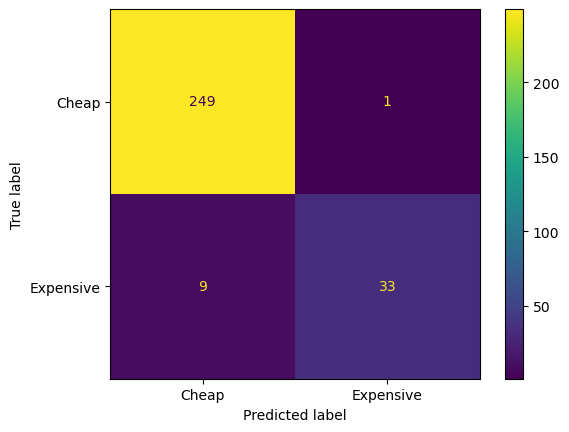

In [53]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_lr,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [386]:
LogisticRegression = lr_df   # pd.DataFrame(search_lr.predict(xx_test))
LogisticRegression.to_csv('LogisticRegression.csv', index=False)

In [381]:
lr_df = pd.DataFrame(search_lr.predict(xx_test))
lr_df.rename(columns = {0:'Expensive'}, inplace=True)
lr_df

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [54]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_lr.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9171597633136095

In [55]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_lr.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.8684210526315789

## 4. sklearn.ensemble.RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

Preprocessing data 

In [57]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [68]:
from sklearn.model_selection import GridSearchCV

#SCALER ????


big_pipeline = make_pipeline(preprocessor,
                              RandomForestClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "randomforestclassifier__random_state":[0],
    "randomforestclassifier__max_depth":[6,9,1],
    "randomforestclassifier__criterion":['gini', 'entropy'],#, 'log_loss'],
    "randomforestclassifier__max_features":["sqrt"],   #, "log2"]
    #"randomforestclassifier__max_samples":[0.0, 1.0],
    "randomforestclassifier__class_weight":["balanced_subsample"],  #"balanced_subsample", 
    "randomforestclassifier__bootstrap":[True, False],
    #"randomforestclassifier__min_impurity_decrease":[0],
    #"randomforestclassifier__n_estimators":[1000]
    #"randomforestclassifier__oob_score":[True, False]
    
}

search_rfc = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_rfc.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_rfc.best_score_}
scores

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'RandomForestClassifier': 0.9451964344668207}

In [69]:
#94,4

#.945
search_rfc.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'randomforestclassifier__bootstrap': False,
 'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__random_state': 0}

accuracy test

In [70]:
accuracy_score(search_rfc.predict(X_test), y_test)
#without any fit to this data

0.958904109589041

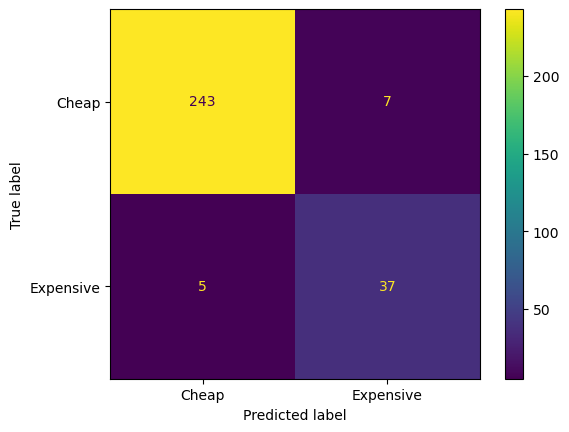

In [71]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_rfc,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [74]:
rfc_df = pd.DataFrame(search_rfc.predict(xx_test))
#rfc_df['Expensive'] = rfc_df[0]
#rfc_df
#rfc_df.drop(columns="Expensive", inplace = True)
rfc_df.rename(columns = {0:'Expensive'}, inplace=True)
#rfc_11 = rfc_df['Expensive']
#rfc_11
rfc_df

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [75]:
RandomForestClassifier_1 = rfc_df   #pd.DataFrame(search_rfc.predict(xx_test))
RandomForestClassifier_1.to_csv('RandomForestClassifier.csv', index=False)

In [76]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_rfc.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9749303621169916

In [77]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_rfc.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.8604651162790699

In [ ]:
TEST DATA 

In [73]:
url = "https://drive.google.com/file/d/1JX55ps4k-Qitl7f9ODRIgOa--MRcMsj6/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
xx_test = pd.read_csv(path)

In [105]:
search.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [388]:
url = "https://drive.google.com/file/d/11GFjtfeUeSSmFByQ3fO0ZcC6LFwbn2ka/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
ids = pd.read_csv(path)
ids

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [ ]:
CONCAT data -
https://www.datacamp.com/tutorial/joining-dataframes-pandas?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720818&utm_adgroupid=143216588777&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=671350460558&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9043202&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-eu_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-sep23&gclid=CjwKCAjw6eWnBhAKEiwADpnw9mcsOkDqFTtDmUgOGfaIkjf64RpQBrrEzwG-JCsSpTRMY9_e0wwrFxoCp8UQAvD_BwE

In [496]:
RandomForestClassifier_1

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [497]:
rfc = pd.concat([ids, RandomForestClassifier_1], axis=1)#, ignore_index=True)
rfc.to_csv('rfc.csv', index=False)

In [394]:
dtc = pd.concat([ids,DecisionTreeClassifier], axis=1)
dtc.to_csv('dtc.csv', index=False)

In [393]:
#KNN = (KNeighborsClassifier[0], ids[0])
KNN = pd.concat([ids, KNeighborsClassifier], axis=1)
KNN.to_csv('KNN.csv', index=False)

In [392]:
lr = pd.concat([ids, LogisticRegression], axis=1)
lr.to_csv('lr.csv', index=False)

In [ ]:
Support Vector Machines  +++  MODEL

In [395]:
from sklearn.svm import SVC

In [417]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [440]:
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(preprocessor,
                              SVC())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "svc__kernel":["linear"],#, "poly", "rbf", "sigmoid"],  #, "precomputed" 'missconfugurate'
    "svc__degree":[1, 3, 1],  #bydefault=3
    "svc__gamma":["scale", "auto"]
    
    
    #"columntransformer__num_pipe__standardscaler__with_mean":[True, False],
    #"columntransformer__num_pipe__standardscaler__with_std":[True, False],
    #"svc__decision_function_shape": ['ovr'],
    #"svc__probability":[False, True],
    #"svc__verbose":[True, False],
    #"svc__shrinking":[True, False],
    #"svc__random_state":[0]
   #"svc__random_state":[0]
    
   # 'C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 
   # 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 
   # 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
       
#LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
 #         intercept_scaling=1, loss='squared_hinge', max_iter=1000,
  #        multi_class='ovr', , random_state=None, tol=0.0001,
   #       verbose=0)
    
}

search_scv = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_scv.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_scv.best_score_}
scores

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'RandomForestClassifier': 0.9340816551116979}

In [429]:
search_scv.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'svc__degree': 1,
 'svc__gamma': 'scale',
 'svc__kernel': 'linear',
 'svc__shrinking': True}

In [441]:
accuracy_score(search_scv.predict(X_test), y_test)
#without any fit to this data

0.9315068493150684

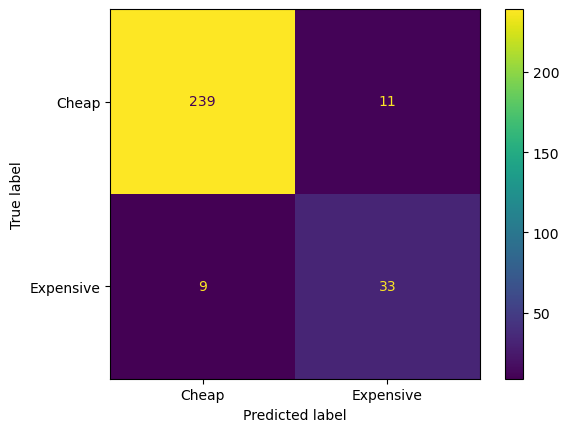

In [442]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_scv,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [443]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_scv.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9452449567723343

In [444]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_scv.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.7674418604651163